In [1]:
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the NetCDF file
file_path = 'chirps-v2.0.2019.days_p25.nc'
dataset = netCDF4.Dataset(file_path, mode='r')

In [3]:
# List all variables
print("Variables in the dataset:")
for var_name in dataset.variables.keys():
    print(var_name)

# Close the NetCDF file
dataset.close()
dataset = netCDF4.Dataset(file_path, mode='r')

Variables in the dataset:
latitude
longitude
precip
time


In [4]:
# Extract data from variables
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
time = dataset.variables['time'][:]
precip = dataset.variables['precip'][:]  # Adjust variable name if needed

# Convert data to a DataFrame and limit the size
data = []
for t_idx, t in enumerate(time[:100]):  # Limit the number of time points
    for lat_idx, lat in enumerate(latitudes):
        for lon_idx, lon in enumerate(longitudes):
            data.append([t, lat, lon, precip[t_idx, lat_idx, lon_idx]])
            if len(data) >= 1000000:  # Stop after 1,000,000 rows
                break
        if len(data) >= 1000000:
            break
    if len(data) >= 1000000:
        break

df = pd.DataFrame(data, columns=['Time', 'Latitude', 'Longitude', 'Precip'])

# Save the DataFrame to an Excel file
df.to_excel('output_data_subset.xlsx', index=False)
print("Data saved to output_data_subset.xlsx")

# Close the NetCDF file
dataset.close()


Data saved to output_data_subset.xlsx


In [5]:


# Open the NetCDF file and inspect variable names
file_path = 'chirps-v2.0.2019.days_p25.nc'
try:
    with netCDF4.Dataset(file_path, mode='r') as dataset:
        # Display all available variables in the dataset
        print("Variables in the dataset:", list(dataset.variables.keys()))

        # Example of accessing a variable (replace 'latitude' and 'longitude' with the actual names)
        latitudes = dataset.variables['latitude'][:]
        longitudes = dataset.variables['longitude'][:]
        precipitation = dataset.variables['precip'][:]  # Replace with actual variable name if different

        print("Data extraction successful.")
        
except RuntimeError as e:
    print(f"Error opening or processing NetCDF file: {e}")


Variables in the dataset: ['latitude', 'longitude', 'precip', 'time']
Data extraction successful.


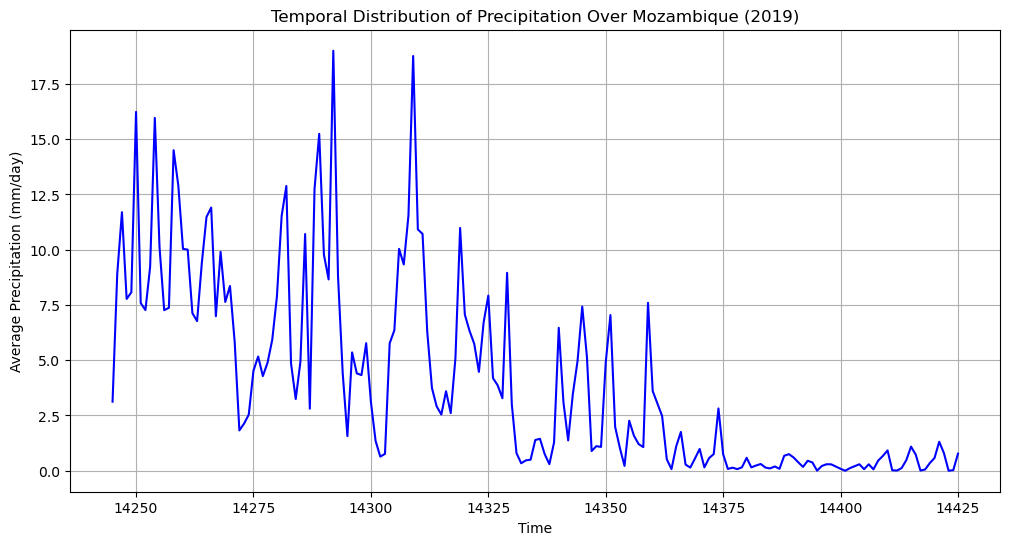

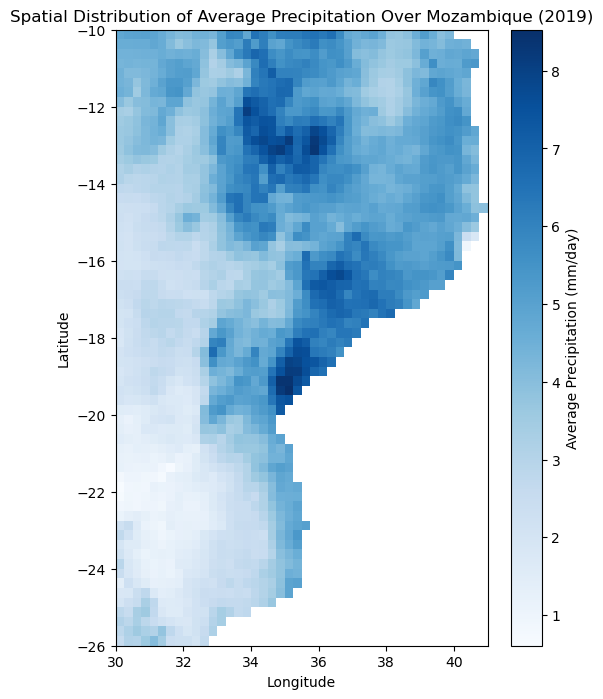

In [6]:


# Load the NetCDF file and extract variables
file_path = 'chirps-v2.0.2019.days_p25.nc'
with netCDF4.Dataset(file_path, mode='r') as dataset:
    # Replace with actual variable names if different
    latitudes = dataset.variables['latitude'][:]
    longitudes = dataset.variables['longitude'][:]
    time = dataset.variables['time'][:]
    precipitation = dataset.variables['precip'][:]

    # Define Mozambique's approximate latitude and longitude bounds
    lat_min, lat_max = -26.0, -10.0
    lon_min, lon_max = 30.0, 41.0

    # Find indices for Mozambique region
    lat_indices = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[0]
    lon_indices = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[0]

    # Extract precipitation data for Mozambique
    mozambique_precip = precipitation[:, lat_indices, :][:, :, lon_indices]

    # Calculate average precipitation over Mozambique at each time step
    avg_precip_over_time = np.mean(mozambique_precip, axis=(1, 2))

    # Plot 1: Temporal Distribution of Precipitation
    plt.figure(figsize=(12, 6))
    plt.plot(time, avg_precip_over_time, color='b')
    plt.title("Temporal Distribution of Precipitation Over Mozambique (2019)")
    plt.xlabel("Time")
    plt.ylabel("Average Precipitation (mm/day)")
    plt.grid()
    plt.show()

    # Plot 2: Spatial Distribution (Average over time)
    avg_precip_spatial = np.mean(mozambique_precip, axis=0)
    lon_grid, lat_grid = np.meshgrid(longitudes[lon_indices], latitudes[lat_indices])

    plt.figure(figsize=(6, 8))
    plt.pcolormesh(lon_grid, lat_grid, avg_precip_spatial, shading='auto', cmap='Blues')
    plt.colorbar(label="Average Precipitation (mm/day)")
    plt.title("Spatial Distribution of Average Precipitation Over Mozambique (2019)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
